# Project Overview: Modeling Appliance Energy Consumption

This notebook provides a comprehensive workflow for predicting appliance energy consumption using machine learning techniques. The project is structured in several key stages to explore the impact of feature engineering, outlier removal, and dimensionality reduction on model performance.

## 1. Baseline Model with Raw Features

- **Objective:** Build an initial regression model using all available features from the dataset, without aggregating or transforming the columns.
- **Approach:** 
    - Load and preprocess the raw data.
    - Handle missing values and perform exploratory data analysis.
    - Train a neural network model using the original set of features.
    - Evaluate model performance using metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE).
- **Purpose:** Establish a baseline for comparison with subsequent models that use feature engineering or data cleaning.

## 2. Model with Outlier Removal

- **Objective:** Assess the effect of removing outliers from the target variable on model accuracy.
- **Approach:**
    - Identify and remove outliers in the target variable (appliance energy usage) using the Interquartile Range (IQR) method.
    - Retrain the regression model on the cleaned dataset.
    - Compare the performance metrics with the baseline model.
- **Purpose:** Demonstrate how outlier removal can lead to more robust and accurate predictions, especially for the majority of typical data points.

## 3. Dimensionality Reduction with PCA

- **Objective:** Explore whether reducing the number of features via Principal Component Analysis (PCA) can improve model performance and generalization.
- **Approach:**
    - Apply PCA to the feature set to extract principal components that capture the most variance in the data.
    - Train a new regression model using the reduced set of principal components.
    - Evaluate and compare the results with previous models.
- **Purpose:** Investigate the benefits of dimensionality reduction in terms of computational efficiency, reduced multicollinearity, and potential improvements in prediction accuracy.

---

**Summary:**  
This notebook systematically guides the reader through the process of building and refining regression models for appliance energy prediction. By comparing models built with raw features, after outlier removal, and with dimensionality reduction, the workflow highlights best practices in data preprocessing and feature engineering for machine learning tasks.
- Dataset is gotten from :https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

In [8]:
import numpy as np
import pandas as pd
# Import libraries for visualization and data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [9]:
#load dataset
dataset = fetch_ucirepo(id=374)
X = dataset.data.features
y = dataset.data.targets

In [10]:
# view the first five rowa of the dataset
print("First five rows of the features:\n", X.head())
print("First five rows of the target:\n", y.head())

First five rows of the features:
                  date  lights     T1       RH_1    T2       RH_2     T3  \
0  2016-01-1117:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
1  2016-01-1117:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2  2016-01-1117:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
3  2016-01-1117:30:00      40  19.89  46.066667  19.2  44.590000  19.79   
4  2016-01-1117:40:00      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  44.730000  19.000000  45.566667  ...  17.033333  45.53   6.60        733.5   
1  44.790000  19.000000  45.992500  ...  17.066667  45.56   6.48        733.6   
2  44.933333  18.926667  45.890000  ...  17.000000  45.50   6.37        733.7   
3  45.000000  18.890000  45.723333  ...  17.000000  45.40   6.25        733.8   
4  45.000000  18.890000  45.530000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibi

In [11]:
#Explore data both features and targets
print("Features shape:", X.shape)

#explore targets
print("Targets shape:", y.shape)

Features shape: (19735, 28)
Targets shape: (19735, 1)


In [12]:

# check for null values
print("Null values in features:\n", X.isnull().sum())
print("Null values in target:\n", y.isnull().sum())

Null values in features:
 date           0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64
Null values in target:
 Appliances    0
dtype: int64


In [13]:
# check for the columns with null values
null_columns = X.columns[X.isnull().any()].tolist()
if null_columns:
    print("Columns with null values:", null_columns)
else:
    print("No columns with null values found.")

No columns with null values found.


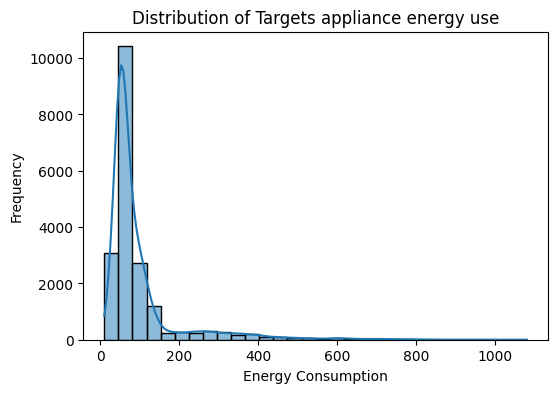

In [14]:
# Visussalization of targets
plt.figure(figsize=(6,4))
sns.histplot(y.values.ravel(), bins=30, kde=True)
plt.title('Distribution of Targets appliance energy use')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

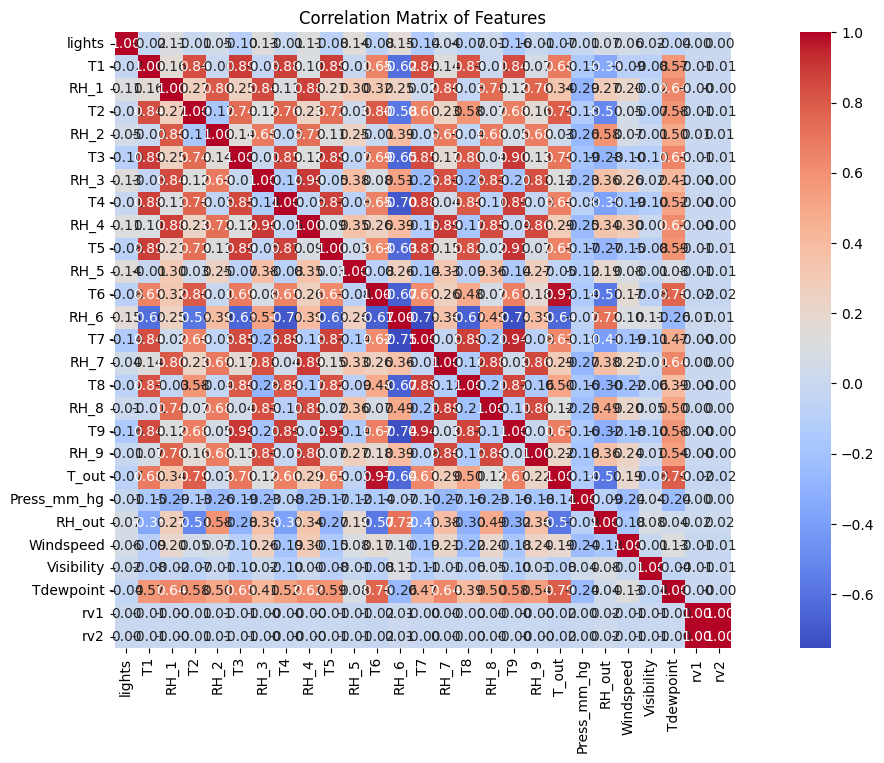

In [56]:
#drop the 'date' column if it exists in the features
df = X.copy()
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)
# visualize the correlation matirix
plt.figure(figsize=(18, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [57]:
# split the dataseet into train amd tests
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2 ,random_state=42)
# check for the shape of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (15788, 27) (15788, 1)


In [58]:
# normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Build neural ndetwork model
model= Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # Add a dropout layer to prevent overfitting
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

c:\Users\User\anaconda3\envs\itc-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Train the model
history = model.fit(
    X_train_scaled, y_train, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=32, 
    verbose=1
)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 14219.4189 - mae: 70.5826 - val_loss: 8978.6602 - val_mae: 52.6408
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 9158.8535 - mae: 53.8940 - val_loss: 8618.0205 - val_mae: 53.6469
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8983.4639 - mae: 53.5311 - val_loss: 8437.0557 - val_mae: 51.0055
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8767.3057 - mae: 52.1232 - val_loss: 8299.3096 - val_mae: 48.6181
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8669.5234 - mae: 51.0617 - val_loss: 8167.8486 - val_mae: 50.7668
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8589.5615 - mae: 51.0407 - val_loss: 8076.9658 - val_mae: 49.9368
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8186.9888 - mae: 49.4948 - val_loss: 8021.6138 - val_mae: 47.8951
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8719.1943 - mae: 50.8770 - val_loss: 8095.6460 - 

### Visualizing Training History

- The following code will plot the loss (Mean Squared Error) and Mean Absolute Error (MAE)
  for both the training and validation sets over the training epochs.
- This helps to assess how well the new model is learning and whether it is overfitting or underfitting.


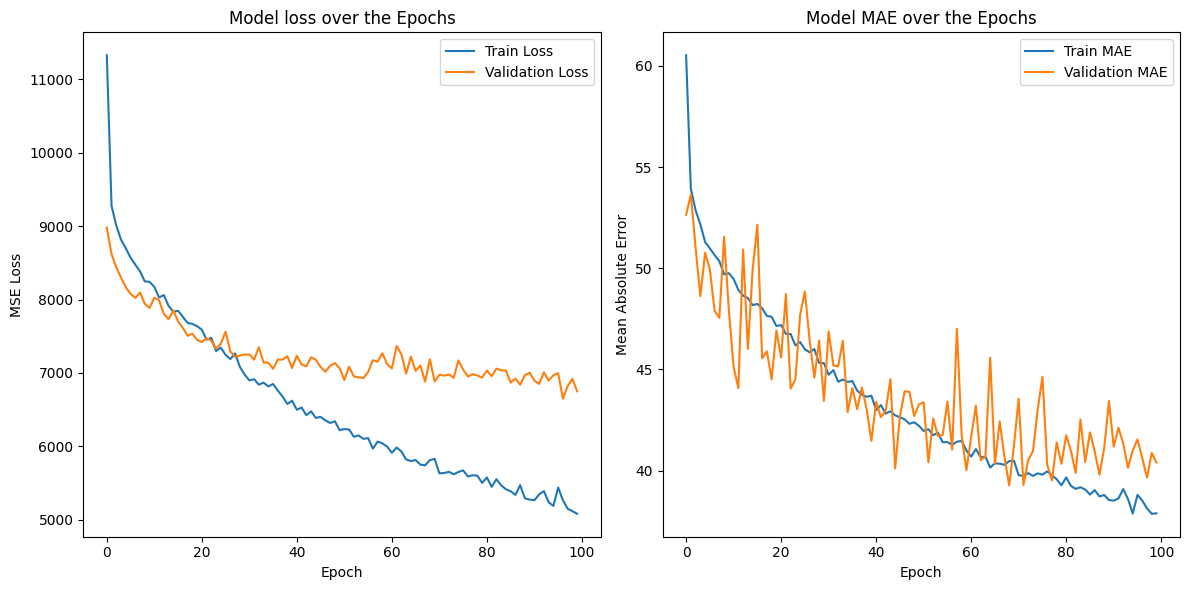

In [35]:
# plot the training history
plt.figure(figsize=(12, 6))
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss over the Epochs')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()

# plot the training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over the Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE; {test_loss: .4f}, Test MAE: {test_mae:.4f}")

Test MSE;  6370.9116, Test MAE: 39.5494


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_7828\296260921.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([y_test.min()[0], y_test.max()[0]], [y_test.min()[0], y_test.max()[0]], color='red', linestyle='--')


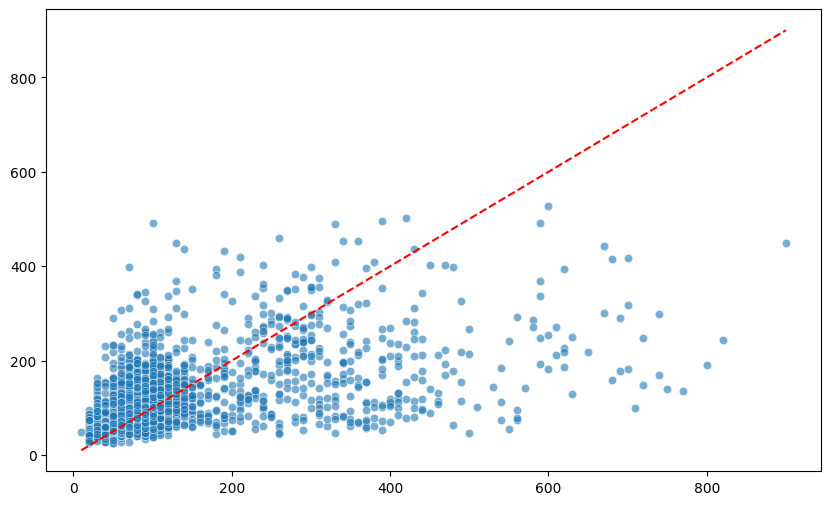

In [37]:
# predict annd plot the actual vs predicted values
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel(), alpha=0.6)
plt.plot([y_test.min()[0], y_test.max()[0]], [y_test.min()[0], y_test.max()[0]], color='red', linestyle='--')

In [38]:
# calcul;ate the mean of target variable
baseline_pred = y_train.mean()

# create array of baseline predictions
baseline_preds = np.full_like(y_test, fill_value=baseline_pred)

# calculate baseline MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
baseline_mse = mean_squared_error(y_test, baseline_preds)
baseline_mae = mean_absolute_error(y_test, baseline_preds)

In [39]:
# compare model performance with baseline
print(f"Baseline MSE: {baseline_mse:.4f}, Baseline MAE: {baseline_mae:.4f}")

improvement_mae = (baseline_mae - test_mae) / baseline_mae * 100
print(f"Improvement in MAE: {improvement_mae:.2f}%")

Baseline MSE: 10007.1961, Baseline MAE: 59.4160
Improvement in MAE: 33.44%


In [40]:
model_mae = mean_absolute_error(y_test, model.predict(X_test_scaled))
print(f"Model MAE: {model_mae:.2f} Wh")

improvement = baseline_mae - model_mae
print(f"Improvement over baseline: {improvement:.2f} Wh")


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model MAE: 39.55 Wh
Improvement over baseline: 19.87 Wh


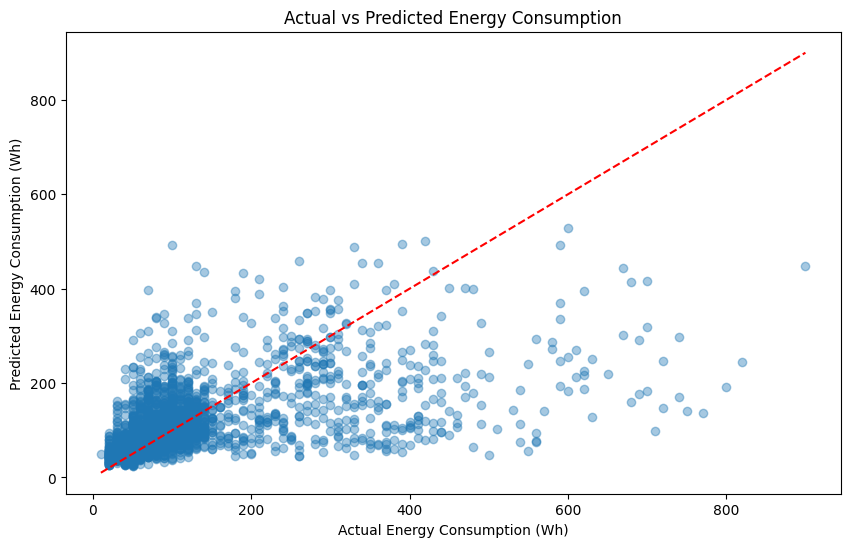

In [41]:
# visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

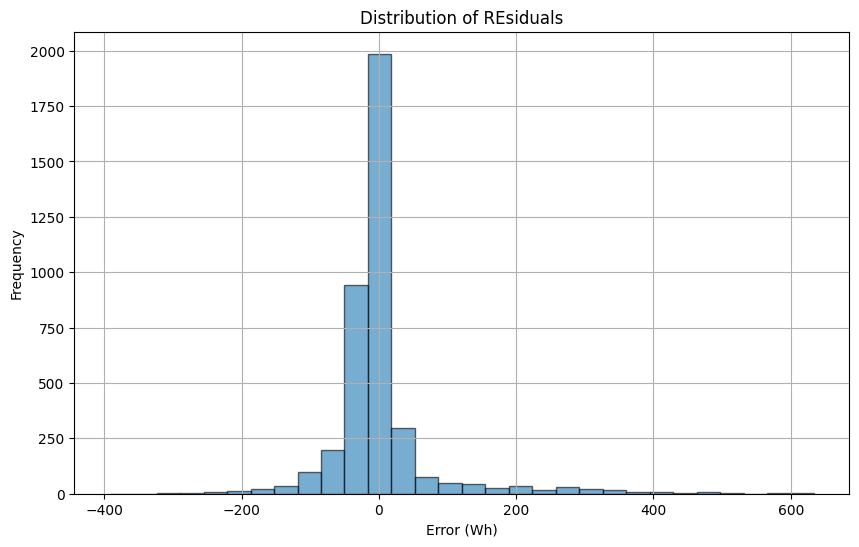

In [42]:
# plot residuals
residuals = y_test.values.ravel() - y_pred.ravel()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.6)
plt.title('Distribution of REsiduals')
plt.xlabel("Error (Wh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [43]:
import scipy.stats as stats

# Test for normality
stat, p = stats.normaltest(residuals)
print(f"P-value: {p}")

P-value: 0.0


### Check the Residual plot to get more clarification about model performance

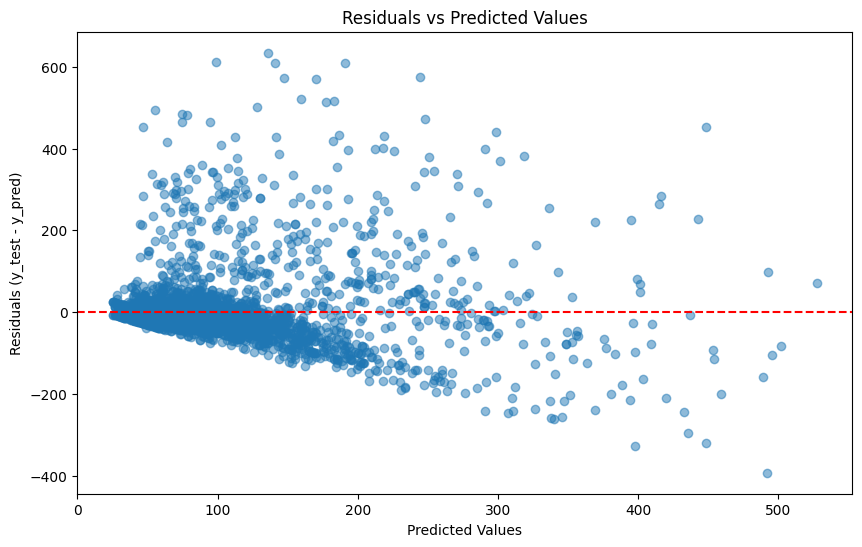

In [44]:

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residuals vs Predicted Values")
plt.show()

### Save model

In [52]:
# save the first model
model.save('energy_consumption_model.keras')
# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Aggregate the Temperature and Humidity columns amd check how model performs

 Since the T_1 - T_9 and RH_1 - RH_9 are the temperature and relative humidity in the building, we will then look at calculating the mean of the of both to reduce the dimensinality

- It is important to be aware of the data dictionary when trying to get the mean temperature and the mean relative humidity 
- This is because the T6 and RH_6 are temperatures of outside the building
- This will result us to calculating the mean outside temperature and the mean outside Relative Humidity i.e (To + T6) = mean_To

In [68]:
df_new = df.copy()

In [70]:
temp_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']
rh_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']
rv_cols = ['rv1', 'rv2']
temp_out_cols = ['T6', 'T_out']
rh_out_cols = ['RH_6', 'RH_out']

# create new columns to store the mean of temperature, relative humidity, and relative volume inside the building
df_new['T-in'] = df_new[temp_cols].mean(axis=1)
df_new['RH-in'] = df_new[rh_cols].mean(axis=1)
df_new['rv'] = df_new[rv_cols].mean(axis=1)
# create new columns to store the mean of temperature, relative humidity, and relative volume outside the building
df_new['T-out'] = df_new[temp_out_cols].mean(axis=1)
df_new['RH-out'] = df_new[rh_out_cols].mean(axis=1)
# drop the original temperature, relative humidity, and relative volume columns
df_new.drop(columns=temp_cols + rh_cols + rv_cols + temp_out_cols + rh_out_cols, inplace=True)

In [71]:
df_new.head()

,lights,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T-in,RH-in,rv,T-out,RH-out
0,30,733.5,7.000000,63.000000,5.3,18.435000,46.742500,13.275433,6.813333,88.128333
1,30,733.6,6.666667,59.166667,5.2,18.439167,46.672708,18.606195,6.656667,88.031667
2,30,733.7,6.333333,55.333333,5.1,18.421667,46.562917,28.642668,6.465000,87.578333
3,40,733.8,6.000000,51.500000,5.0,18.396250,46.468750,45.410390,6.341667,87.711667
4,40,733.9,5.666667,47.666667,4.9,18.408750,46.462917,10.084097,6.248333,88.446667


### Convert the Windspeed from m/s to Km/h

In [72]:
# convert windspeed from m/s to km/h
df_new['Windspeed'] = df_new['Windspeed'] * 3.6


### ckeck the correlation of the new features 

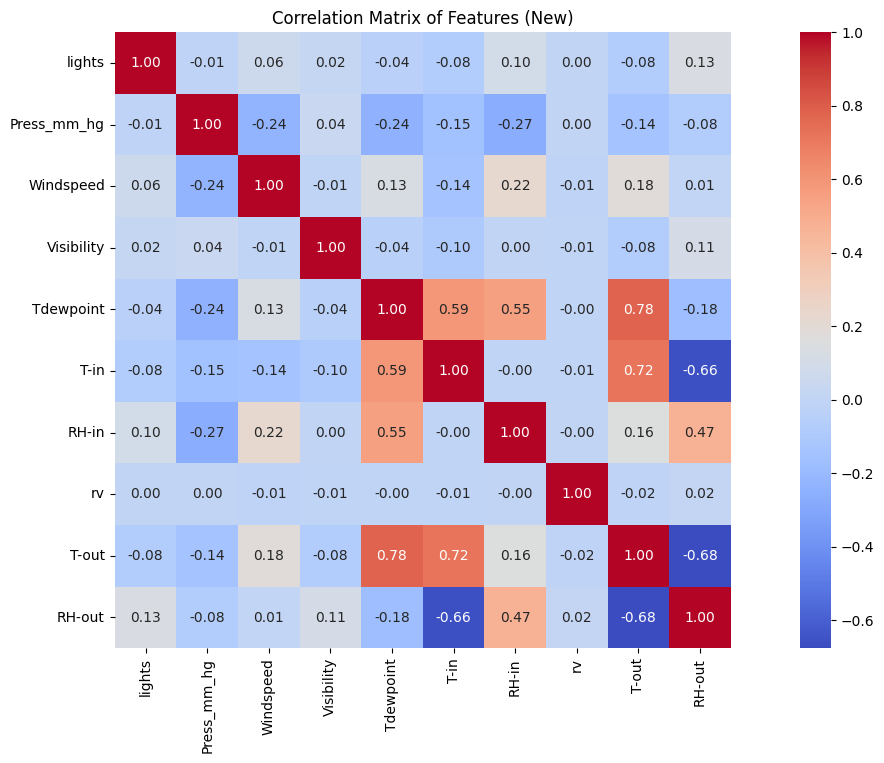

In [73]:
# check for colleration matrix
plt.figure(figsize=(18, 8))
correlation_matrix_new = df_new.corr()
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features (New)')
plt.show()

### important note on the Multicolinearity of columns/features

- The T-out and Tdewpoint are the most noticable due to high correlation with each other and this can result in the poor model performance and can result in potential redundancy
- The Temperature outside the building also affects the Temperature inside the building which will result us in dropping the T-out column 

In [76]:
# drop the T-out column
df_new.drop(columns=['T-out'], inplace=True)

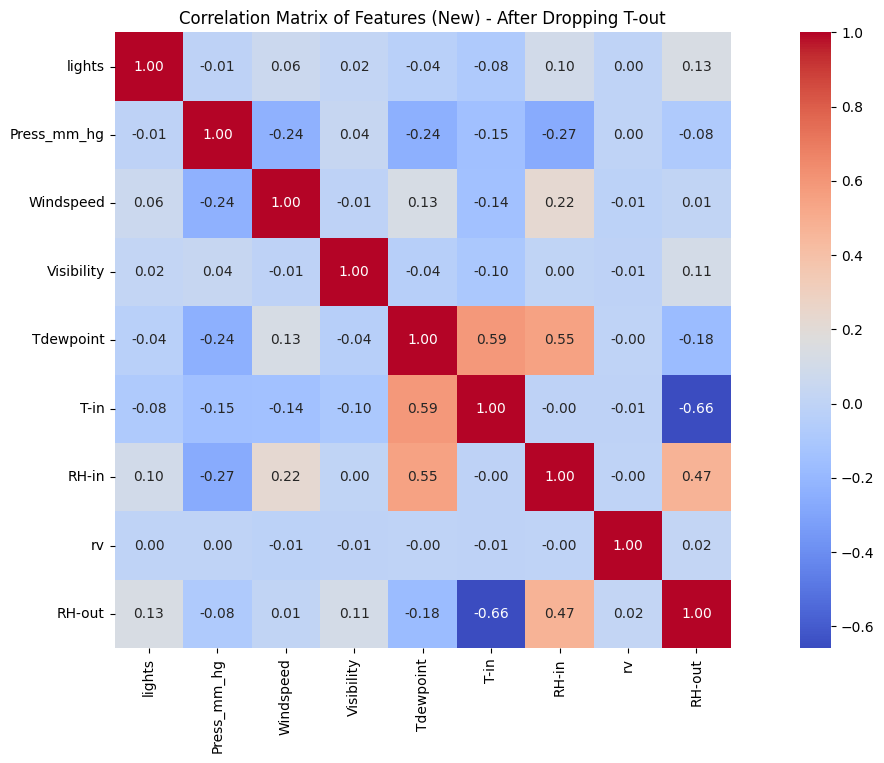

In [77]:
# re-check the correlation matrix
plt.figure(figsize=(18, 8))
correlation_matrix_new = df_new.corr()
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features (New) - After Dropping T-out')
plt.show()

- Correlaton is still okay since we don't have any reaching 0.6

### Split the new dataset into Train and Test

In [79]:
# split the dataset into train and test sets again
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new, y, test_size=0.2, random_state=42)
# normalize the new data
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras import regularizers
# build a new neural network model
model_new = Sequential([
    Input(shape=(X_train_new_scaled.shape[1],)),
    
    Dense(128, activation='relu'),
    # Add batch normalization to stabilize learning
    BatchNormalization(),
    # Add a dropout layer to prevent overfitting
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    # Add batch normalization to stabilize learning
    BatchNormalization(),
    
    Dense(32, activation='relu'),
    
    Dense(1)  # Output layer for regression
])

model_new.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [100]:
# Train the new model
history_new = model_new.fit(
    X_train_new_scaled, y_train_new,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 16100.8926 - mae: 80.8494 - val_loss: 9747.8457 - val_mae: 51.7520
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10153.3096 - mae: 56.6190 - val_loss: 9254.2354 - val_mae: 54.1413
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9493.0312 - mae: 55.9809 - val_loss: 9229.9414 - val_mae: 53.4707
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10039.5596 - mae: 56.9408 - val_loss: 9113.8330 - val_mae: 53.0709
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9394.0645 - mae: 55.1225 - val_loss: 9176.1123 - val_mae: 52.9421
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9894.9775 - mae: 56.6566 - val_loss: 8982.9785 - val_mae: 53.7879
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9368.8672 - mae: 54.4506 - val_loss: 8897.5117 - val_mae: 52.1913
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9040.0879 - mae: 53.5553 - val_loss: 8851.5566 

### Plot the Training and Validation Metrics

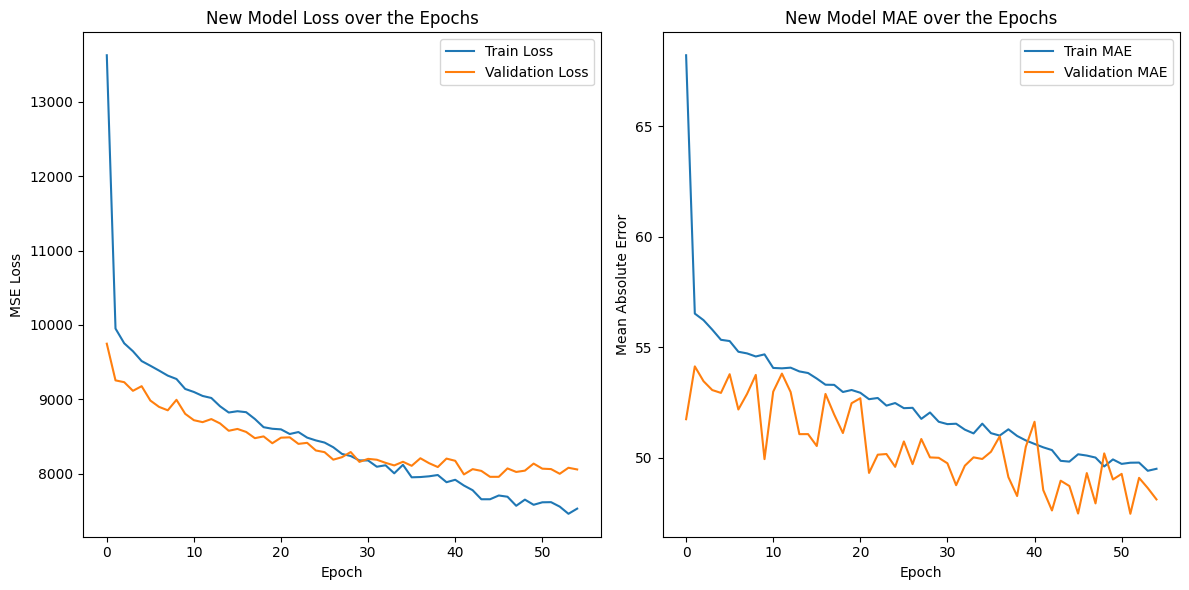

In [101]:
# Plot the training history of the new model
plt.figure(figsize=(12, 6))
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_new.history['loss'], label='Train Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.title('New Model Loss over the Epochs')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_new.history['mae'], label='Train MAE')
plt.plot(history_new.history['val_mae'], label='Validation MAE')
plt.title('New Model MAE over the Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
# Evaluate the model on the new test set
test_loss_new, test_mae_new = model_new.evaluate(X_test_new_scaled, y_test_new, verbose=0)
print(f"New Test MSE: {test_loss_new:.4f}, New Test MAE: {test_mae_new:.4f}")

New Test MSE: 7752.2827, New Test MAE: 48.7833


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


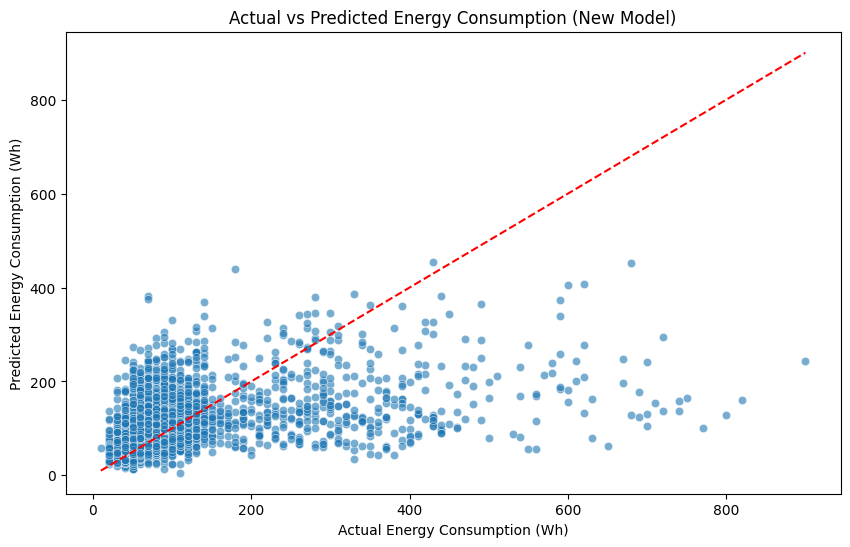

In [104]:
# Predict and plot the actual vs predicted values for the new model
y_pred_new = model_new.predict(X_test_new_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_new.values.ravel(), y=y_pred_new.ravel(), alpha=0.6)
plt.plot(
    [y_test_new.min().iloc[0], y_test_new.max().iloc[0]],
    [y_test_new.min().iloc[0], y_test_new.max().iloc[0]],
    color='red',
    linestyle='--'
)
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Actual vs Predicted Energy Consumption (New Model)')
plt.show()

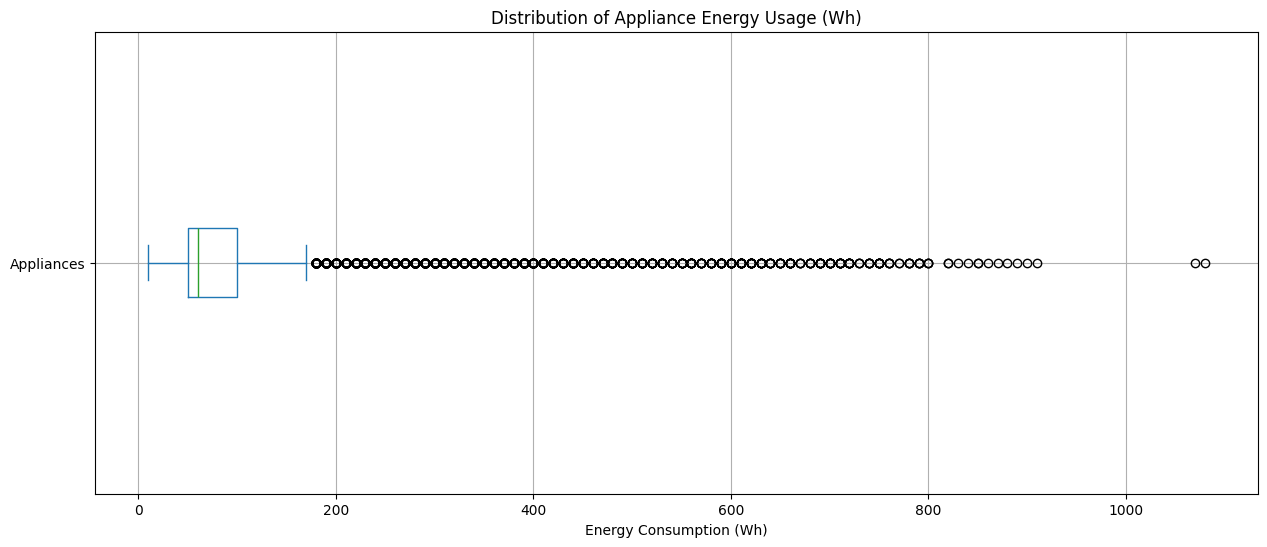

In [107]:
# Boxplot for the target variable using pandas style
fig, ax = plt.subplots(figsize=(15, 6))
y["Appliances"].plot(kind="box", vert=False, title="Distribution of Appliance Energy Usage (Wh)", ax=ax)

plt.xlabel("Energy Consumption (Wh)")
plt.grid(True)
plt.show()

### The box plot above shows that the target variable (Appliance Energy Usage) contains several outliers.
### These outliers can negatively impact the performance of regression models, as they may cause the model to fit extreme values rather than the general trend of the data.
### As a result, the model may underperform and produce less accurate predictions for the majority of the data.

# Removing Outliers and doing some more Features engineering then building a different model


In [110]:
# combine the features and target into a single DataFrame
df_combined = pd.concat([df_new, y], axis=1)
# view the  first five rows of the combined DataFrame
print("First five rows of the combined DataFrame:\n", df_combined.head())

First five rows of the combined DataFrame:
    lights  Press_mm_hg  Windspeed  Visibility  Tdewpoint       T-in  \
0      30        733.5       25.2   63.000000        5.3  18.435000   
1      30        733.6       24.0   59.166667        5.2  18.439167   
2      30        733.7       22.8   55.333333        5.1  18.421667   
3      40        733.8       21.6   51.500000        5.0  18.396250   
4      40        733.9       20.4   47.666667        4.9  18.408750   

       RH-in         rv     RH-out  Appliances  
0  46.742500  13.275433  88.128333          60  
1  46.672708  18.606195  88.031667          60  
2  46.562917  28.642668  87.578333          50  
3  46.468750  45.410390  87.711667          50  
4  46.462917  10.084097  88.446667          60  


In [111]:
# calculate IQR for the target variable
Q1 = df_combined['Appliances'].quantile(0.25)
Q3 = df_combined['Appliances'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [114]:
# filter out the outliers
df_no_outliers = df_combined[(df_combined['Appliances'] >= lower_bound) & (df_combined['Appliances'] <= upper_bound)]
# view the first five rows of the DataFrame without outliers
print("First five rows of the DataFrame without outliers:\n", df_no_outliers.head())

First five rows of the DataFrame without outliers:
    lights  Press_mm_hg  Windspeed  Visibility  Tdewpoint       T-in  \
0      30        733.5       25.2   63.000000        5.3  18.435000   
1      30        733.6       24.0   59.166667        5.2  18.439167   
2      30        733.7       22.8   55.333333        5.1  18.421667   
3      40        733.8       21.6   51.500000        5.0  18.396250   
4      40        733.9       20.4   47.666667        4.9  18.408750   

       RH-in         rv     RH-out  Appliances  
0  46.742500  13.275433  88.128333          60  
1  46.672708  18.606195  88.031667          60  
2  46.562917  28.642668  87.578333          50  
3  46.468750  45.410390  87.711667          50  
4  46.462917  10.084097  88.446667          60  


In [115]:
# separate the features and target variable again
X_no_outliers = df_no_outliers.drop(columns=['Appliances'])
y_no_outliers = df_no_outliers['Appliances']

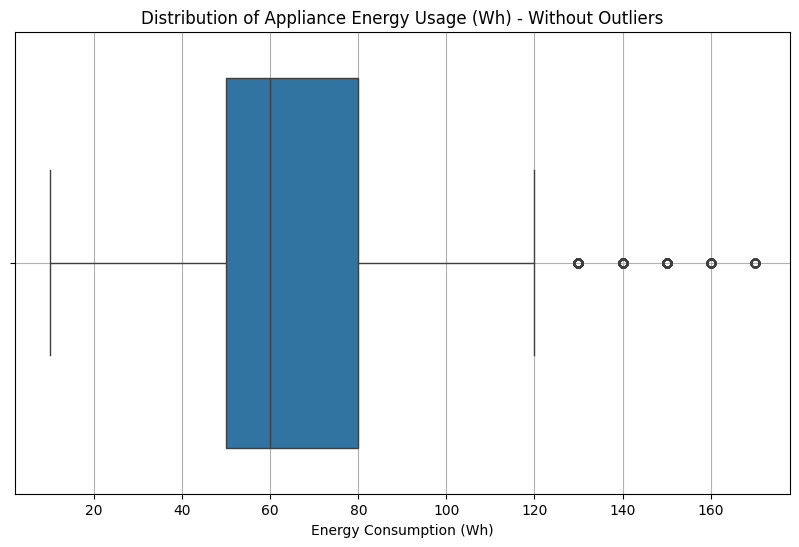

In [117]:
# plot boxplot for the target variable without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_no_outliers, orient='h')
plt.title('Distribution of Appliance Energy Usage (Wh) - Without Outliers')
plt.xlabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()

In [118]:
# split the dataset without outliers into train and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# normalize the new data without outliers
X_train_no_outliers_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_no_outliers_scaled = scaler.transform(X_test_no_outliers)

# build a new neural network model without outliers
model_no_outliers = Sequential([
    Input(shape=(X_train_no_outliers_scaled.shape[1],)),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(1)  # Output layer for regression
])

# compile the new model without outliers
model_no_outliers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [119]:
# add early stopping to prevent overfitting
early_stopping_no_outliers = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the new model without outliers
history_no_outliers = model_no_outliers.fit(
    X_train_no_outliers_scaled, y_train_no_outliers,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping_no_outliers]
)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 3567.7954 - mae: 51.3420 - val_loss: 648.1620 - val_mae: 18.7397
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 702.4519 - mae: 19.8259 - val_loss: 567.1782 - val_mae: 18.1415
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 646.2264 - mae: 19.1864 - val_loss: 563.9238 - val_mae: 17.8877
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 648.8568 - mae: 19.1843 - val_loss: 554.9030 - val_mae: 17.9998
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 645.5217 - mae: 19.0581 - val_loss: 554.7727 - val_mae: 17.7647
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 601.6471 - mae: 18.3435 - val_loss: 542.5667 - val_mae: 17.3013
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 620.2704 - mae: 18.6225 - val_loss: 546.3414 - val_mae: 17.6289
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 587.9422 - mae: 18.2045 - val_loss: 533.3141 - val_mae: 17.3417

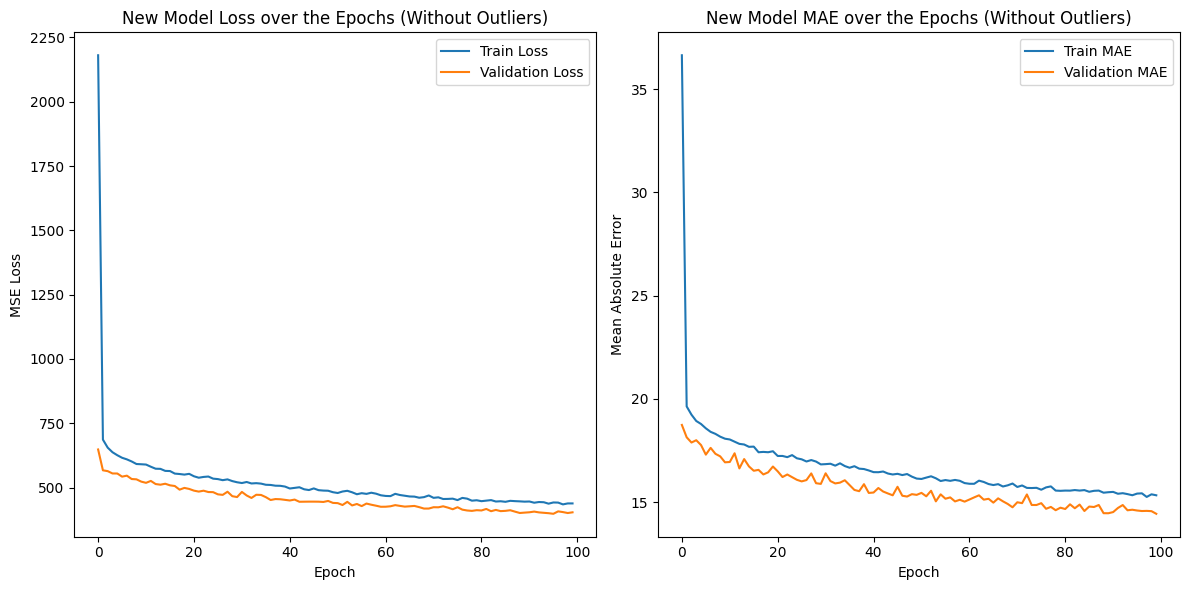

In [120]:
# plot the training history of the new model without outliers
plt.figure(figsize=(12, 6))
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_no_outliers.history['loss'], label='Train Loss')
plt.plot(history_no_outliers.history['val_loss'], label='Validation Loss')
plt.title('New Model Loss over the Epochs (Without Outliers)')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_no_outliers.history['mae'], label='Train MAE')
plt.plot(history_no_outliers.history['val_mae'], label='Validation MAE')
plt.title('New Model MAE over the Epochs (Without Outliers)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
# evaluate the model on the new test set without outliers
test_loss_no_outliers, test_mae_no_outliers = model_no_outliers.evaluate(X_test_no_outliers_scaled, y_test_no_outliers, verbose=0)
print(f"New Test MSE (Without Outliers): {test_loss_no_outliers:.4f}, New Test MAE (Without Outliers): {test_mae_no_outliers:.4f}")

New Test MSE (Without Outliers): 465.8842, New Test MAE (Without Outliers): 15.1836


### Save the model, cleaned dataset and scalar

In [122]:
# save teh  new model without outliers and cleaned data
model_no_outliers.save('energy_consumption_model_no_outliers.keras')
# Save the scaler for future use
joblib.dump(scaler, 'scaler_no_outliers.pkl')
# save the cleaned data without outliers
df_no_outliers.to_csv('cleaned_energy_consumption_data.csv', index=False)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


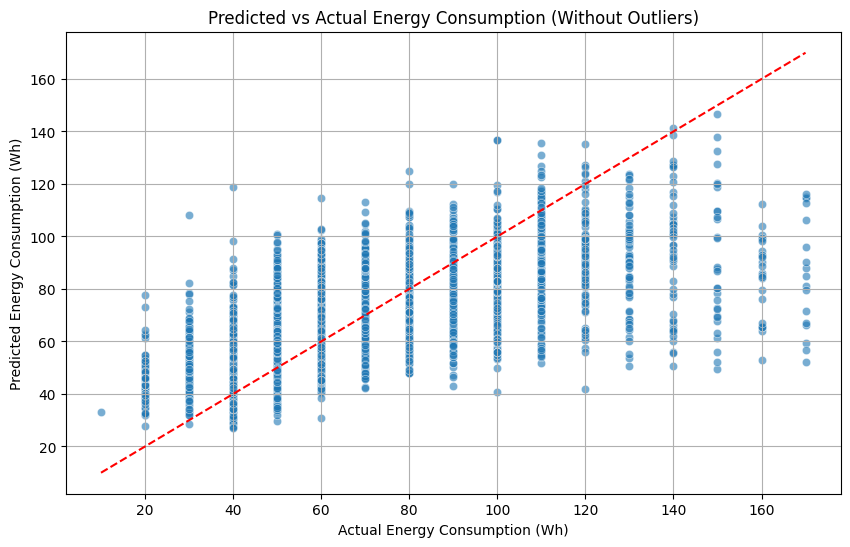

In [124]:
# predict and plot the actual vs predicted values for the new model without outliers
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_no_outliers.values.ravel(), y=y_pred_no_outliers.ravel(), alpha=0.6)
plt.plot(
    [y_test_no_outliers.min(), y_test_no_outliers.max()],
    [y_test_no_outliers.min(), y_test_no_outliers.max()],
    color='red',
    linestyle='--'
)
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Predicted vs Actual Energy Consumption (Without Outliers)')
plt.grid(True)
plt.show()

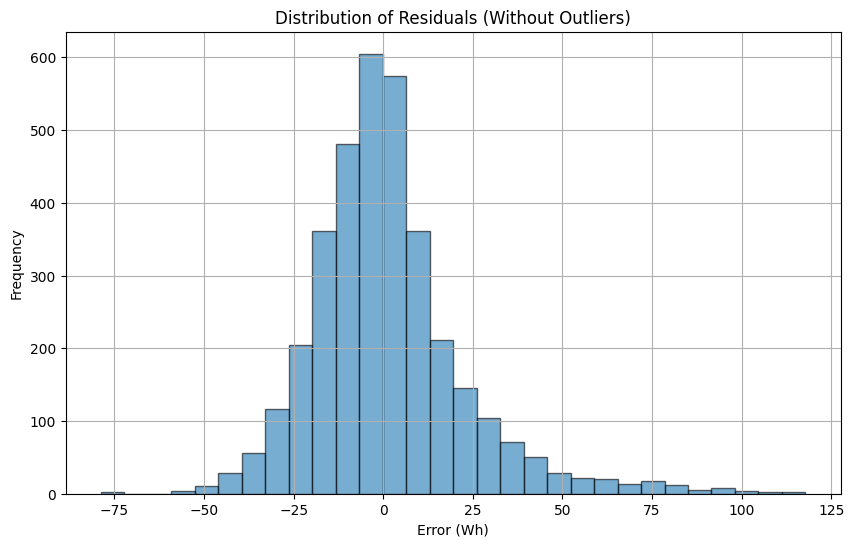

In [125]:
# plot the residuals for the new model without outliers
residuals_no_outliers = y_test_no_outliers.values.ravel() - y_pred_no_outliers.ravel()
plt.figure(figsize=(10, 6))
plt.hist(residuals_no_outliers, bins=30, edgecolor='black', alpha=0.6)
plt.title('Distribution of Residuals (Without Outliers)')
plt.xlabel("Error (Wh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- Observation and interpretation
- The residual plot shows a roughly normal distribution centered around zero, indicating low bias and good overall model fit after removing outliers. However, the predicted vs actual plot reveals a tendency to underpredict higher energy consumption values, suggesting the model could benefit from adjustments to better handle extreme cases.

### Using PCA Dimensionality reduction to check if a better model can be made without removing any outliers

In [ ]:
# view the raw dataset columns
df.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

### Determining the Optimal Number of Principal Components with PCA

- The following code scales the raw feature data and applies Principal Component Analysis (PCA) to determine how many components are needed to capture most of the variance in the dataset.
- The plot shows the cumulative explained variance as a function of the number of principal components.
- The red dashed line marks the threshold where 95% of the variance is explained, helping to select the optimal number of components for dimensionality reduction.

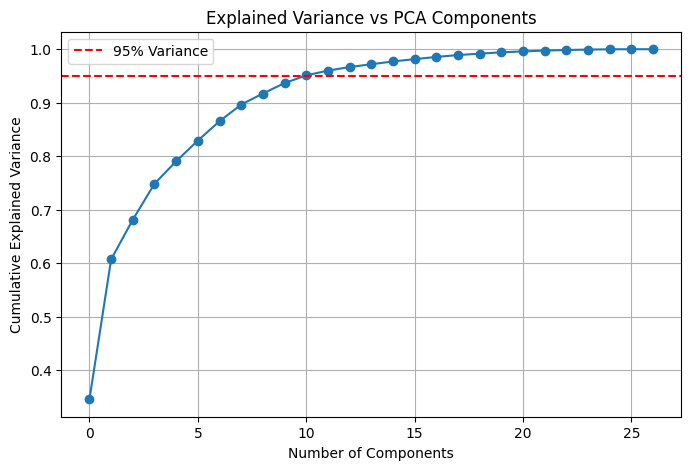

In [132]:
# scale the raw data 
raw_data_scaled = scaler.fit_transform(df)

# check the number of dimeension for PCA
from sklearn.decomposition import PCA
pca = PCA().fit(raw_data_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs PCA Components')
plt.grid(True)
plt.legend()
plt.show()




In [139]:
# Apply PCA of n_components=0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(raw_data_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# view the first five rows of the PCA DataFrame
print("First five rows of the PCA DataFrame:\n", pca_df.head()) 

First five rows of the PCA DataFrame:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.913949  4.689526 -1.431558  1.194505  2.472022 -0.132121  2.855605   
1 -2.932551  4.618418 -0.905236  1.226540  2.496459 -0.246425  2.554296   
2 -2.972968  4.533169  0.070206  1.353055  2.526447 -0.365034  2.258093   
3 -3.064495  4.511911  1.679808  1.647068  3.504417 -0.183701  1.968520   
4 -3.043124  4.487672 -1.683976  0.910635  3.493387 -0.328169  1.642083   

        PC8       PC9      PC10      PC11  
0 -1.840447 -0.748849 -1.296611 -0.203491  
1 -1.839683 -0.853926 -1.282426 -0.130623  
2 -1.849840 -0.949642 -1.300192 -0.124527  
3 -2.575463 -1.014967 -1.388801 -0.009973  
4 -2.655938 -1.118336 -1.405739 -0.033530  


In [141]:
# split the dataset for PCA into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2, random_state=42)

# Build a neural network model using PCA components
model_pca = Sequential([
    Input(shape=(X_train_pca.shape[1],)),

    # Dense(128, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(1)  # Output layer for regression
])

# compile the PCA model
model_pca.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# add early stopping to prevent overfitting
early_stopping_pca = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [142]:
# Train the PCA model
history_pca = model_pca.fit(
    X_train_pca, y_train_pca,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping_pca]
)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 16195.1982 - mae: 79.7267 - val_loss: 9405.3262 - val_mae: 53.8914
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9447.2344 - mae: 54.9592 - val_loss: 9056.3125 - val_mae: 55.6368
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9459.4541 - mae: 55.5641 - val_loss: 8832.3770 - val_mae: 53.3945
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9217.2363 - mae: 54.4922 - val_loss: 8787.6367 - val_mae: 50.7730
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9238.5498 - mae: 53.5069 - val_loss: 8676.4092 - val_mae: 52.5037
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8885.6338 - mae: 53.6900 - val_loss: 8732.4336 - val_mae: 53.2761
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9655.6338 - mae: 55.2148 - val_loss: 8643.5381 - val_mae: 50.5840
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9219.4150 - mae: 53.0666 - val_loss: 8583.6260 - 

In [143]:
# Evaluate the PCA model on the test set
test_loss_pca, test_mae_pca = model_pca.evaluate(X_test_pca, y_test_pca, verbose=0)
print(f"PCA Test MSE: {test_loss_pca:.4f}, PCA Test MAE: {test_mae_pca:.4f}")

PCA Test MSE: 7529.7974, PCA Test MAE: 47.5047


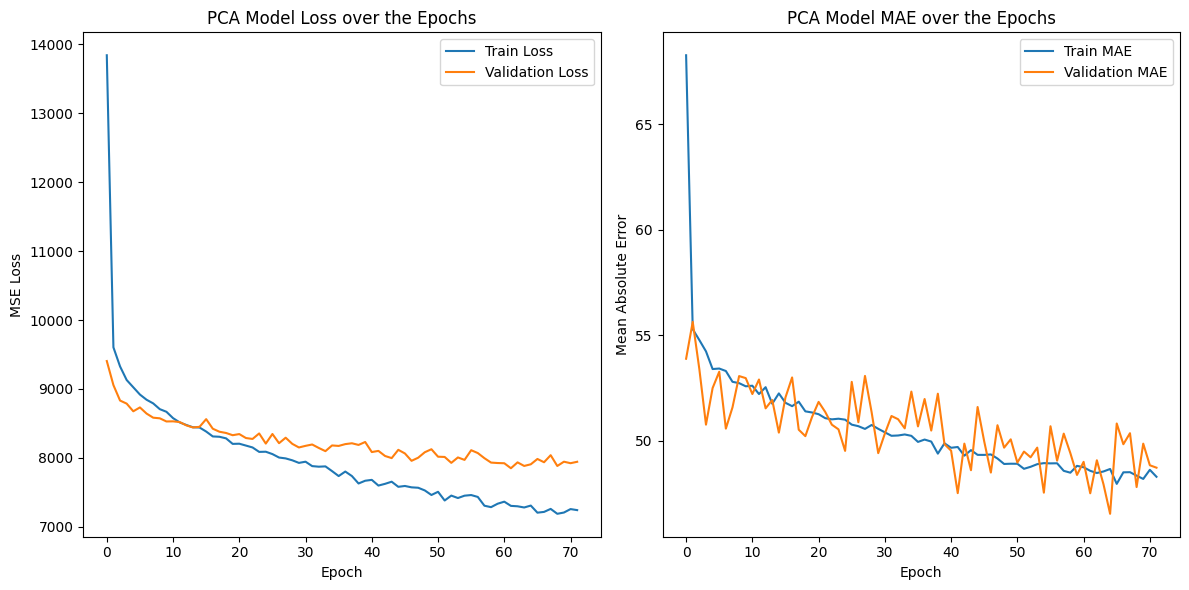

In [144]:
# plot the training history of the PCA model
plt.figure(figsize=(12, 6))
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_pca.history['loss'], label='Train Loss')
plt.plot(history_pca.history['val_loss'], label='Validation Loss')
plt.title('PCA Model Loss over the Epochs')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_pca.history['mae'], label='Train MAE')
plt.plot(history_pca.history['val_mae'], label='Validation MAE')
plt.title('PCA Model MAE over the Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


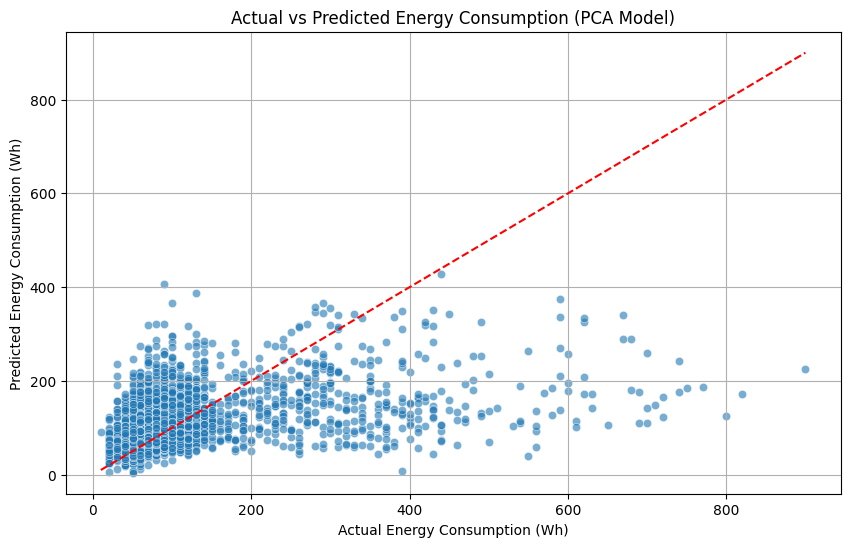

In [145]:
# save the PCA model
model_pca.save('energy_consumption_model_pca.keras')

# Predict and plot the actual vs predicted values for the PCA model
y_pred_pca = model_pca.predict(X_test_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pca.values.ravel(), y=y_pred_pca.ravel(), alpha=0.6)
plt.plot(
    [y_test_pca.min().iloc[0], y_test_pca.max().iloc[0]],
    [y_test_pca.min().iloc[0], y_test_pca.max().iloc[0]],
    color='red',
    linestyle='--'
)
plt.xlabel('Actual Energy Consumption (Wh)')
plt.ylabel('Predicted Energy Consumption (Wh)')
plt.title('Actual vs Predicted Energy Consumption (PCA Model)')
plt.grid(True)
plt.show()

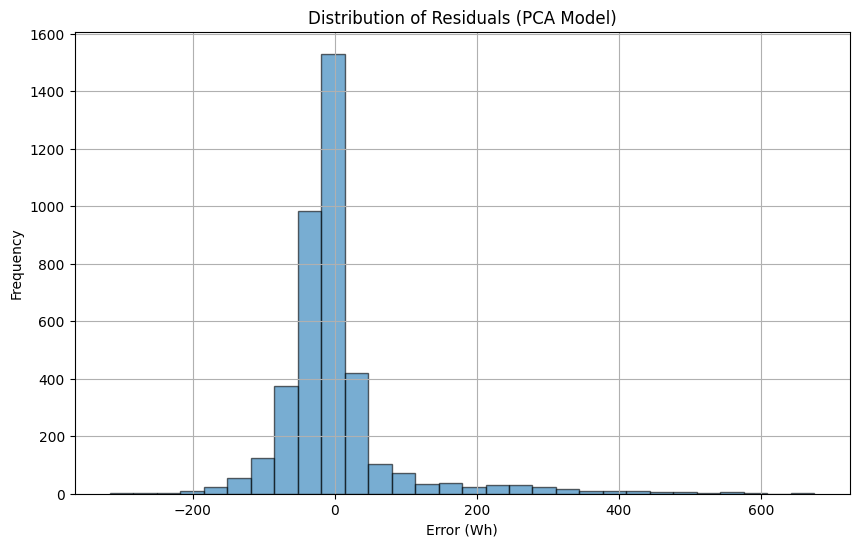

In [146]:
# plot the residuals for the PCA model
residuals_pca = y_test_pca.values.ravel() - y_pred_pca.ravel()
plt.figure(figsize=(10, 6))
plt.hist(residuals_pca, bins=30, edgecolor='black', alpha=0.6)
plt.title('Distribution of Residuals (PCA Model)')
plt.xlabel("Error (Wh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Conclusion

From the comparative results, it is evident that **data quality and preprocessing have a stronger impact on model performance than architectural complexity alone**. While regularization techniques such as *L2* and *Batch Normalization* introduced slight improvements in robustness, they did not outperform the **initial neural network**, which already achieved a **33.44% improvement in MAE** over the baseline. The most substantial gain came from **removing outliers**, resulting in a dramatic **74.45% reduction in MAE**, underscoring the critical role of handling anomalies in real-world datasets.

Although **PCA with 95% variance retention** aided in dimensionality reduction, it slightly reduced model performance, likely due to the loss of informative features. 

> **Key takeaway:** Clean, well-prepared data is often more valuable than adding complexity to a model. Prioritizing **targeted preprocessing** like outlier removal can significantly enhance predictive accuracy in energy consumption forecasting tasks.
